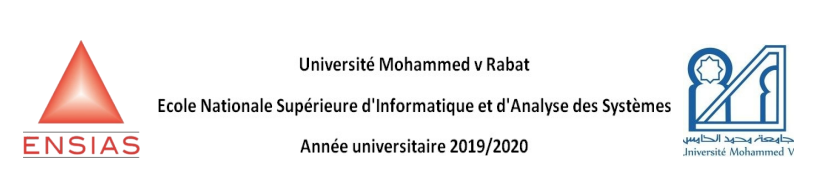

<h1><center style="color: Black"> Ecole Nationale Supérieure d’Informatique et d’Analyse des Systèmes </center></h1>

: <h2><center style="color: Green">Web-Scraper:prédiction et classification des cours des action comerciaux </center></h2>

 La récupération de données sur le Web est un aspect important de la construction de modèles d'apprentissage automatique. Comme nous le savons, les données sont en quelque sorte l'épine dorsale de toute tâche d'apprentissage automatique,Dans ce cas d'utilisation, nous allons récupérer les détails d'un site Web financier https://www.investing.com/equities/trending-stocks

<h1  style="color: Green">Partie 1: scraping</h1>


<h2  style="color:brown">Importation des libraire</h2>

In [17]:
# here we are importing all the requisite libraries which will help us in scrapping the data.
import bs4
import requests
from bs4 import BeautifulSoup
import lxml
from urllib.request import Request,urlopen
import re
import csv
import requests
import pandas as pd
import numpy as np
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium import webdriver
import time

<h2  style="color:brown"> Appel initial au site Web</h2>

In [18]:
'''
In this block we do the initial call to the website. Using BeautifulSoup library helps us to parse the
HTML details and use it further

'''
url = 'https://www.investing.com/equities/trending-stocks'
#This particular line is used to over come the issue where wesite detects that it has been access through a script or bot
headers = {'User-Agent': 'Mozilla/5.0'}  
result = requests.get(url, headers=headers)
r=result.content.decode()

<h2  style="color:brown">1. Scrape the Trending stocks:</h2>

Dans le site Web, les actions en vogue sont présentes en haut de la page et il y a 6 blocs différents qui montrent quelles actions de la société sont en vogue actuellement. Après avoir obtenu les résultats du bloc ci-dessus, nous analysons d'abord les détails HTML, puis en accédant aux détails par élément, nous obtenons les détails. Nous pouvons trouver les détails de la classe pour accéder à l'élément dans le fichier html rendu.

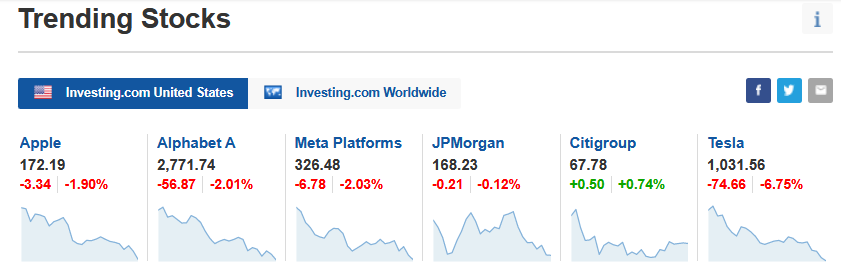

In [19]:
data_for_marketChart=(BeautifulSoup(r, "html.parser").find_all('div', attrs={"class":"marketChart"}))

Organization= []
Share_Value= []
Increase_Decrease= []
Pchange = []

for details in data_for_marketChart:   #looping through the parse html file and accessing details through element class
  Organization.append(details.find_all('a',attrs={"class":"bold block"})[0].text)
  Share_Value.append(details.find_all('div',attrs={"class":"bold"})[0].text)
  Increase_Decrease.append(details.find_all('span')[0].text)
  Pchange.append(details.find_all('span')[1].text)


marketChart =pd.DataFrame({"Organization": Organization, "Share_Value": Share_Value, "Increase_Decrease": Increase_Decrease, "Pchange": Pchange})
marketChart

,Organization,Share_Value,Increase_Decrease,Pchange
0,Apple,173.07,+0.88,+0.51%
1,Alphabet A,"2,789.61",+17.87,+0.64%
2,Meta Platforms,331.90,+5.42,+1.66%
3,Tesla,"1,049.61",+18.05,+1.75%
4,Amazon.com,"3,242.76",+18.48,+0.57%
5,Pinterest,32.83,-0.14,-0.42%


<h2  style="color:brown">2. Scrape the trending Stocks by Popularity:</h2>

Les détails de la popularité des actions sont présentés dans un graphique à barres sur le site Web. Après une observation attentive, vous pouvez voir que les données du graphique ont été stockées dans une variable stockPopularityData. Nous avons accédé à la variable et obtenu tous les détails de celle-ci.

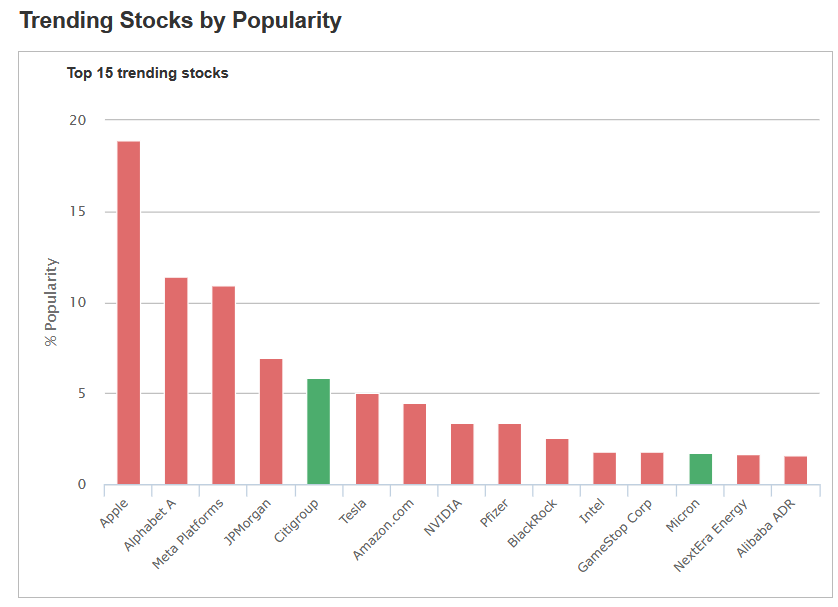

In [20]:
text_data = result.text
Popularity_data=[]
pattern = re.compile(r"var stockPopularityData =.*") #Used Regex to access the variable data
d=pattern.findall(text_data)
stockPopularityData=eval(d[0].split('=')[1][:-1]) #used eval function to convert it as json format
for key in stockPopularityData:
  Popularity_data.append(stockPopularityData[key])  #itereating the details and accessing value of the dictionary

stockPopularityData = pd.DataFrame(Popularity_data)
stockPopularityData

,percentage,pair_name,pair_change,index
0,15.742025,Apple,+0.51,1
1,11.858530,Alphabet A,+0.64,2
2,11.650485,Meta Platforms,+1.66,3
3,3.814147,Tesla,+1.75,4
4,2.843273,Amazon.com,+0.57,5
5,2.773925,Pinterest,-0.42,6
6,2.635229,Molycorp,0.00,7
7,2.635229,Suncor Energy,+1.31,8
8,2.635229,Bionano Genomics,+0.39,9
9,2.565881,Velodyne Lidar,-0.72,10


Après avoir obtenu toutes les données dans le graphique à barres, nous devons effectuer un certain prétraitement afin de tracer ce graphique à barres exact ici. Nous avons donc créé une nouvelle colonne qui suggère quelle action a un changement de paire négatif et quelle action a un changement positif. Cela nous aidera à tracer des barres de différentes couleurs. Ensuite, nous avons utilisé la bibliothèque Motplotlib pour recréer le graphique.

In [21]:
stockPopularityData['pair_change'] = stockPopularityData['pair_change'].apply(lambda x:eval(x)) #converting to numbers as read data is in text format
stockPopularityData['positive']= np.where(stockPopularityData['pair_change']>0, 'green', 'red')
stockPopularityData

,percentage,pair_name,pair_change,index,positive
0,15.742025,Apple,0.51,1,green
1,11.858530,Alphabet A,0.64,2,green
2,11.650485,Meta Platforms,1.66,3,green
3,3.814147,Tesla,1.75,4,green
4,2.843273,Amazon.com,0.57,5,green
5,2.773925,Pinterest,-0.42,6,red
6,2.635229,Molycorp,0.00,7,red
7,2.635229,Suncor Energy,1.31,8,green
8,2.635229,Bionano Genomics,0.39,9,green
9,2.565881,Velodyne Lidar,-0.72,10,red


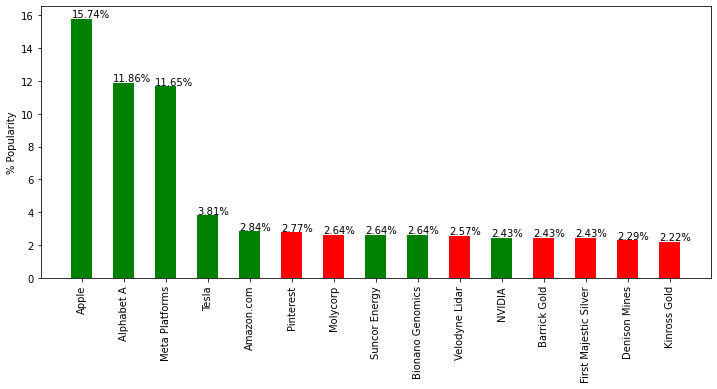

In [22]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5)) 

#Defining the X and Y axis values
x = stockPopularityData.pair_name.tolist()
y = stockPopularityData.percentage.tolist()
 
plt.bar(x, y,color = stockPopularityData.positive,width=0.5)
plt.xticks(rotation=90) 
xlocs, xlabs = plt.xticks()
#To show the percentage of popularity above the bar
for i, v in enumerate(y):
    nv = "{:.2f}".format(v)  
    plt.text(xlocs[i] - 0.25, v + 0.1, str(nv)+'%')
plt.ylabel('% Popularity')
plt.show()

<h2  style="color:brown">3.3. Scrape the trending Stocks by Sector:</h2>

Comme pour notre deuxième tâche, les détails des actions de tendance sectorielle sont également présents dans une variable sectorPopularityData. De même, nous avons accès aux détails de la variable par laquelle nous avons obtenu nos données.

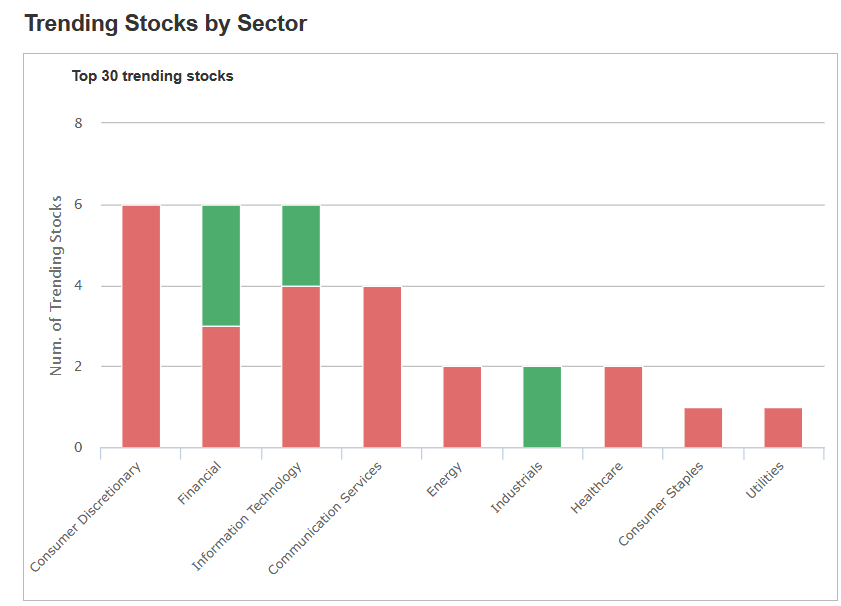

In [23]:
text_data = result.text
Sector_data=[]
pattern = re.compile(r"var sectorPopularityData =.*") #Used Regex to access the variable data
d=pattern.findall(text_data)
sectorPopularityData=eval(d[0].split('=')[1][:-1])
for key in sectorPopularityData:                 
    Sector_data.append(sectorPopularityData[key])   #itereating the details and accessing value of the dictionary

sectorPopularityData = pd.DataFrame(Sector_data)
sectorPopularityData

,sectorName,sectorPairs
0,Financial,"{'267': {'pair_change': '-10.34'}, '15358': {'..."
1,Communication Services,"{'6369': {'pair_change': '+17.87'}, '6378': {'..."
2,Information Technology,"{'6408': {'pair_change': '+0.88'}, '6497': {'p..."
3,Consumer Discretionary,"{'6435': {'pair_change': '+18.48'}, '13845': {..."
4,Materials,"{'7891': {'pair_change': '-0.080'}, '13928': {..."
5,Healthcare,"{'7989': {'pair_change': '-0.59'}, '1096240': ..."
6,Real Estate,"{'8135': {'pair_change': '-2.39'}, '20787': {'..."
7,Energy,"{'32519': {'pair_change': '+0.37'}, '33982': {..."
8,Consumer Staples,{'1173264': {'pair_change': '-0.31'}}


Comme ci-dessus, les détails de la paire de secteurs ne sont pas très bien alignés pour être utilisés. Nous devons les traiter davantage pour les rendre utilisables.

In [24]:
all_pairs = []
for values in Sector_data:
    for ids,va in values['sectorPairs'].items():
        all_pairs.append([values['sectorName'],ids,va['pair_change']]) #Accessed the individual details of nested dictionaries as we see above
    
sectorPopularityData = pd.DataFrame(all_pairs,columns=['sectorName','SectorPairs','Pair_change'])
sectorPopularityData['Pair_change'] = sectorPopularityData['Pair_change'].apply(lambda x:eval(x)) #used eval to convert into numbers as read data is in text format 
sectorPopularityData

,sectorName,SectorPairs,Pair_change
0,Financial,267,-10.3400
1,Financial,15358,-0.1000
2,Communication Services,6369,17.8700
3,Communication Services,6378,2.0200
4,Communication Services,26490,5.4200
5,Communication Services,1127189,-0.1400
6,Information Technology,6408,0.8800
7,Information Technology,6497,3.6700
8,Information Technology,1096533,-0.0300
9,Consumer Discretionary,6435,18.4800


In [25]:
#Preprocessed further to recreate the given bar chart
sectorPopularityData_new = sectorPopularityData.groupby('sectorName').Pair_change.apply(lambda x: pd.Series([(x < 0).sum(), (x >= 0).sum()])).unstack()
sectorPopularityData_new.columns = ['Negative','Positive'] #created a new data frame stating howmany +ve and -ve stocks under same Sector
sectorPopularityData_new

,Negative,Positive
sectorName,,
Communication Services,1,3
Consumer Discretionary,1,4
Consumer Staples,1,0
Energy,1,1
Financial,2,0
Healthcare,1,2
Information Technology,1,2
Materials,5,2
Real Estate,3,0


In [26]:
sectorPopularityData_new=sectorPopularityData_new.sort_values(['Negative','Positive'],ascending =False) #Sorting the data

<h2  style="color:brown">4.Scrape Trending Stock en fonction du prix, de la performance, de la technique et des données fondamentales.</h2>

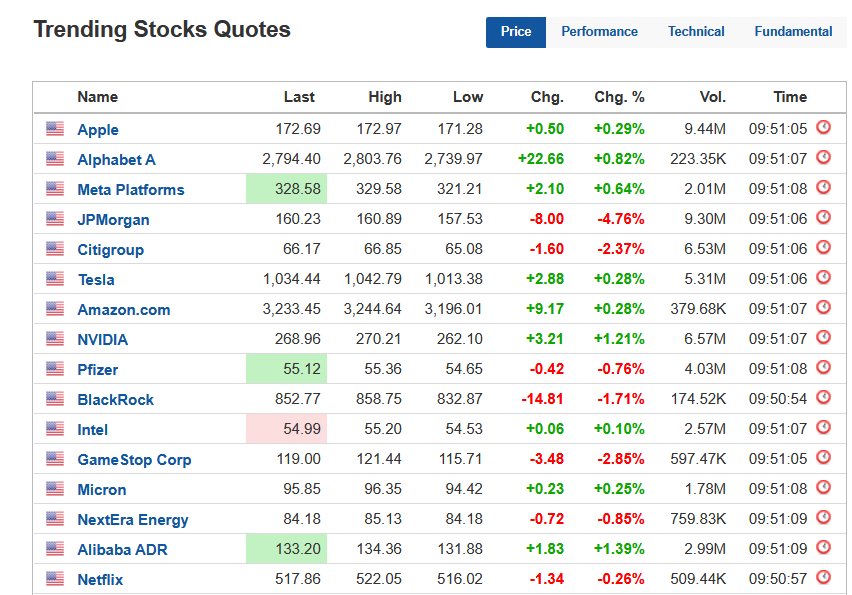

C'est une partie intéressante du cas d'utilisation. Ici, nous avons 4 onglets différents à parcourir et à extraire toutes les données possibles. Pour cette tâche, j'ai utilisé la bibliothèque Selenium python pour automatiser la tâche d'accès à chaque bouton. Après avoir accédé à la page, nous récupérons les détails web par le biais du pilote Selenium et les traitons pour obtenir nos données.

In [ ]:
#The first this we need to do is to download the chrome driver and set the driver path
chrome_path = r"C:\Users\user\Downloads\chromedriver_win32\chromedriver.exe"


def click_tab(xpath,tab):
    '''
    This function helps to access each tabs by automating the click process.
    
    input: xpath element of the respective Tab
    output: Parsed web object containing the html details for the file
    
    '''
    time.sleep(2)
    button = WebDriverWait(driver,60).until(EC.presence_of_element_located((By.XPATH, xpath)))
    button.click()
    time.sleep(2)
    page_source = driver.page_source
    if tab=='Price':
        data = BeautifulSoup(page_source,"html.parser").find_all('tbody')
    else:
        data = BeautifulSoup(page_source,"html.parser").find_all('table')
    return data

#here we are accessing the website through webdriver
driver = webdriver.Chrome(chrome_path)
driver.get("https://www.investing.com/equities/trending-stocks")

#In this part we are accessing the pop up button and close the pop up so that we can further process our task
#Change the wait time if pop up loads longer 
WebDriverWait(driver,30).until(EC.frame_to_be_available_and_switch_to_it((By.XPATH,"//iframe[@title='TrustArc Cookie Consent Manager']")))
WebDriverWait(driver,30).until(EC.element_to_be_clickable((By.XPATH,"//a[text()='Got it']"))).click()

time.sleep(2)
#We are accessing each Tab and clicking it then geting the page details and saving it
Price_Details = click_tab("""//*[@id="filter_price"]""",'Price')
Performance_Details = click_tab("""//*[@id="filter_performance"]""",'Performance')
Technical_Details  = click_tab("""//*[@id="filter_technical"]""",'Tech')
Fundamental_Details = click_tab("""//*[@id="filter_fundamental"]""",'Fun')

    

In [ ]:
#In this part we are accessing the pop up button and close the pop up so that we can further process our task
#Change the wait time if pop up loads longer 

### Read data après scraping

In [20]:
import pandas as pd
Appel=pd.read_csv("C:/Users/bouib/OneDrive/Bureau/projet datapreprocessing/Apple Historical Data 2017-2022.csv")
google=pd.read_csv("C:/Users/bouib/OneDrive/Bureau/projet datapreprocessing/GOOGL Historical Data 2017-2022.csv")

Amazon=pd.read_csv("C:/Users/bouib/OneDrive/Bureau/projet datapreprocessing/AMZN Historical Data 2017-2022.csv")
Tesla=pd.read_csv("C:/Users/bouib/OneDrive/Bureau/projet datapreprocessing/TSLA Historical Data 2017-2022.csv")


<h2  style="color:brown">Appel</h2>

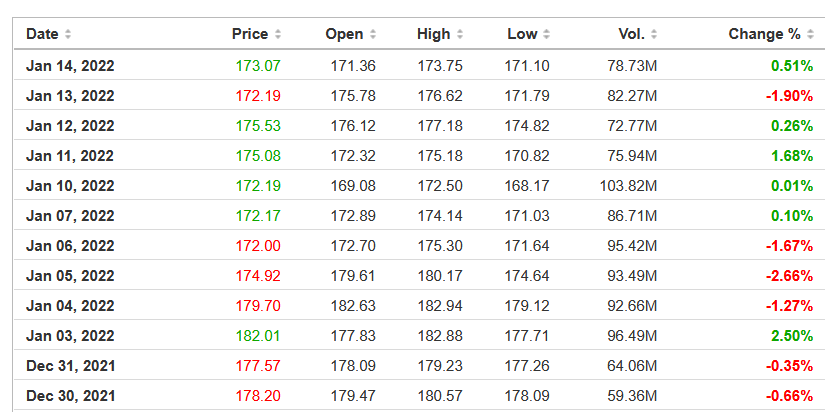


<h2  style="color:brown">Resultats de scraping</h2>

In [9]:
Appel.head(6)

,Date,Price,Open,High,Low,Vol.,Change %
0,"Jan 14, 2022",173.07,171.36,173.75,171.10,78.73M,0.51%
1,"Jan 13, 2022",172.19,175.78,176.62,171.79,82.27M,-1.90%
2,"Jan 12, 2022",175.53,176.12,177.18,174.82,72.77M,0.26%
3,"Jan 11, 2022",175.08,172.32,175.18,170.82,75.94M,1.68%
4,"Jan 10, 2022",172.19,169.08,172.50,168.17,103.82M,0.01%
5,"Jan 07, 2022",172.17,172.89,174.14,171.03,86.71M,0.10%


<h2  style="color:brown">Google</h2>

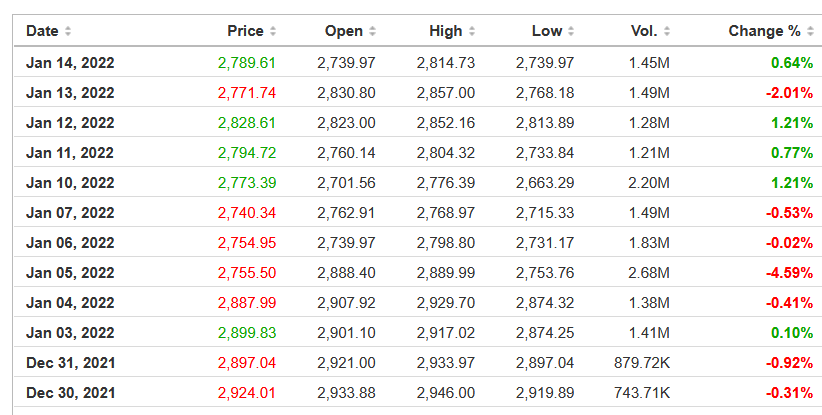

<h2  style="color:b">Resultats de scraping</h2>

In [21]:
google.head(6)

,Date,Price,Open,High,Low,Vol.,Change %
0,"Jan 14, 2022","2,789.61","2,739.97","2,814.73","2,739.97",1.45M,0.64%
1,"Jan 13, 2022","2,771.74","2,830.80","2,857.00","2,768.18",1.49M,-2.01%
2,"Jan 12, 2022","2,828.61","2,823.00","2,852.16","2,813.89",1.28M,1.21%
3,"Jan 11, 2022","2,794.72","2,760.14","2,804.32","2,733.84",1.21M,0.77%
4,"Jan 10, 2022","2,773.39","2,701.56","2,776.39","2,663.29",2.20M,1.21%
5,"Jan 07, 2022","2,740.34","2,762.91","2,768.97","2,715.33",1.49M,-0.53%


<h2  style="color:brown">Amazon</h2>

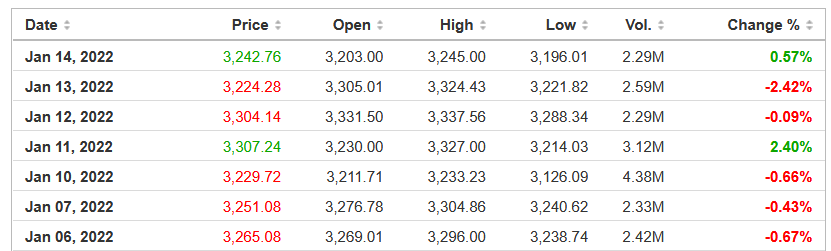

<h2  style="color:geen">Resultats de scraping</h2>

In [28]:
Amazon.head(6)

,Date,Price,Open,High,Low,Vol.,Change %
0,"Jan 14, 2022","3,242.76","3,203.00","3,244.75","3,197.39",2.28M,0.57%
1,"Jan 13, 2022","3,224.28","3,305.01","3,324.43","3,221.82",2.59M,-2.42%
2,"Jan 12, 2022","3,304.14","3,331.50","3,337.56","3,288.34",2.29M,-0.09%
3,"Jan 11, 2022","3,307.24","3,230.00","3,327.00","3,214.03",3.12M,2.40%
4,"Jan 10, 2022","3,229.72","3,211.71","3,233.23","3,126.09",4.38M,-0.66%
5,"Jan 07, 2022","3,251.08","3,276.78","3,304.86","3,240.62",2.33M,-0.43%


<h2  style="color:brown">Tesla</h2>

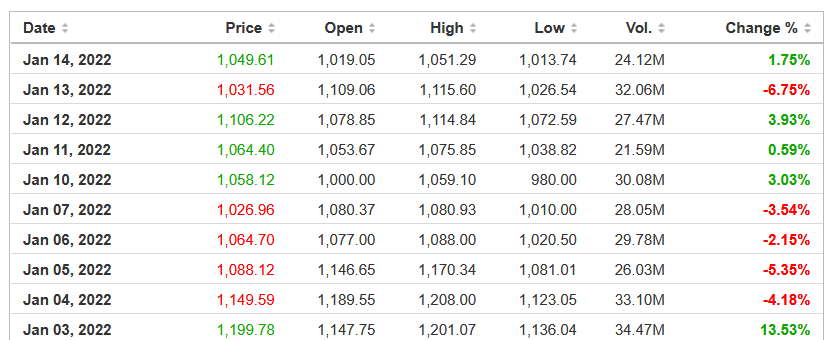

<h2  style="color:geen">Resultats de scraping</h2>

In [26]:
Tesla.head(6)

,Date,Price,Open,High,Low,Vol.,Change %
0,"Jan 14, 2022","1,049.61","1,019.05","1,051.29","1,013.74",24.12M,1.75%
1,"Jan 13, 2022","1,031.56","1,109.06","1,115.60","1,026.54",32.06M,-6.75%
2,"Jan 12, 2022","1,106.22","1,078.85","1,114.84","1,072.59",27.47M,3.93%
3,"Jan 11, 2022","1,064.40","1,053.67","1,075.85","1,038.82",21.59M,0.59%
4,"Jan 10, 2022","1,058.12","1,000.00","1,059.10",980.00,30.08M,3.03%
5,"Jan 07, 2022","1,026.96","1,080.37","1,080.93","1,010.00",28.05M,-3.54%
